# Notebook Overview 


This notebook is made for my revision. The idea is to understand Linear Regression and revise this concept by solving a problem using this concept. So ,lets dive in...


## Problem Statement 

We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.shape

(1338, 7)

In [49]:
numeric_cols = df.describe().columns.values
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [50]:
null_values = [df[x].isnull().sum() for x in df.columns]
print(null_values)

[0, 0, 0, 0, 0, 0, 0]


In [51]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


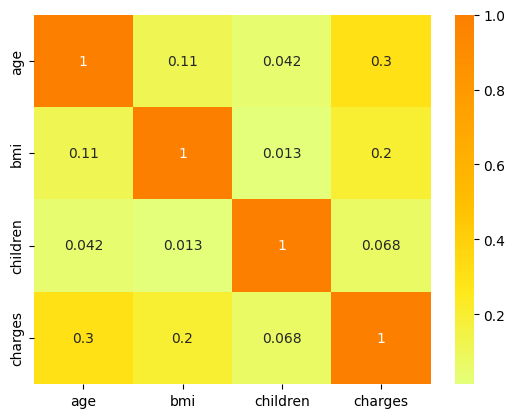

In [52]:
corr =df[numeric_cols].corr()
sns.heatmap(corr,cmap='Wistia',annot =True)
plt.show()

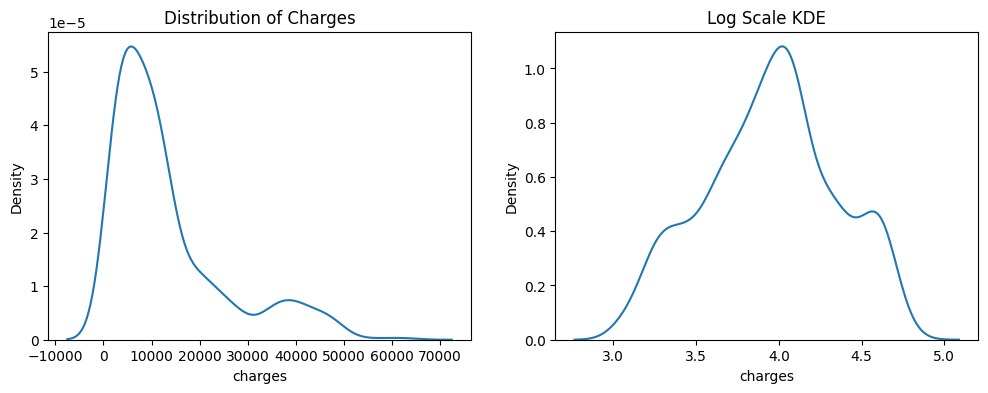

In [53]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.kdeplot(df['charges'],ax=ax)
ax.set_title('Distribution of Charges')

ax = f.add_subplot(122)
sns.kdeplot((np.log10(df['charges'])),ax=ax)
ax.set_title('Log Scale KDE')
plt.show()

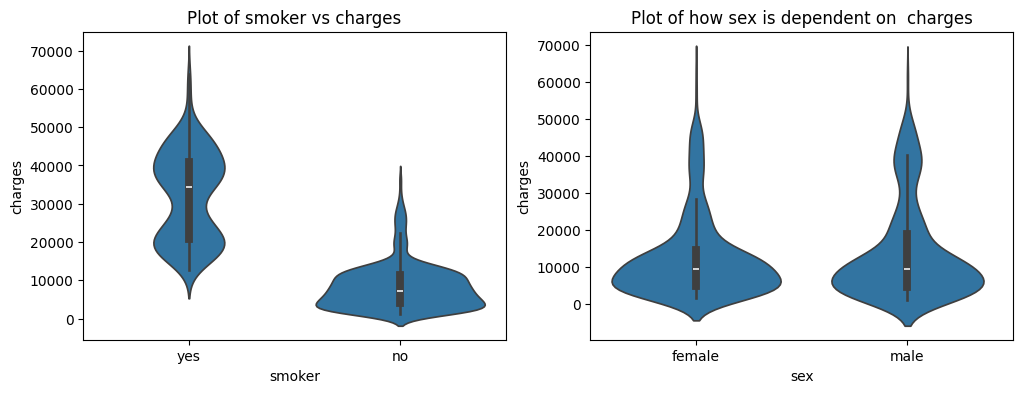

In [54]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.violinplot(df,x='smoker',y='charges',ax=ax)
ax.set_title('Plot of smoker vs charges')

ax = f.add_subplot(122)
sns.violinplot(df,x='sex',y='charges',ax=ax)
ax.set_title('Plot of how sex is dependent on  charges')
plt.show()

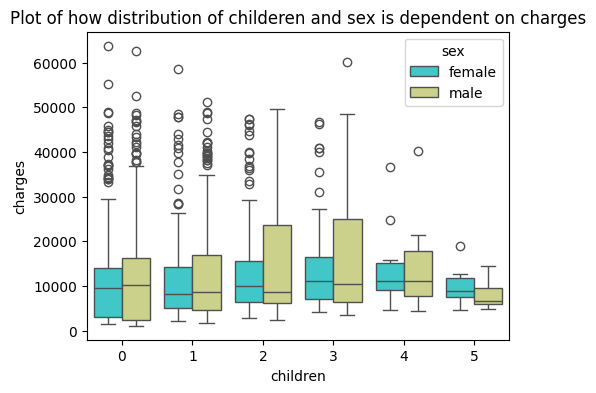

In [55]:
f= plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow',ax=ax)
ax.set_title('Plot of how distribution of childeren and sex is dependent on charges')
plt.show()

In [56]:
# pd.set_option('future.no_silent_downcasting', True)
# df['sex']= df['sex'].replace(to_replace=['female','male'],value=[0,1])
# df['smoker']= df['smoker'].replace(to_replace=['yes','no'],value=[1,0])



# Modelling 

In [57]:
categoric_columns = [x for x in df.columns if x not in numeric_cols]

df = pd.get_dummies(data=df , prefix='',prefix_sep='',
               columns = categoric_columns,
               drop_first =True,
              dtype='int8')


In [58]:
df

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [59]:
df['charges'] = np.log10(df['charges'])

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=X_train,y=y_train)

LinearRegression()

In [68]:
model.intercept_

3.0728193662807777

In [69]:
model.coef_

array([ 0.01435628,  0.00595229,  0.04416569, -0.03037555,  0.67193332,
       -0.02373945, -0.06306218, -0.05873987])

In [71]:
model.feature_names_in_

array(['age', 'bmi', 'children', 'male', 'yes', 'northwest', 'southeast',
       'southwest'], dtype=object)

In [76]:
y_prediction = model.predict(X_test)

In [79]:
J_mse = np.sum((y_prediction - y_test)**2)/ X_test.shape[0]
sse = np.sum((y_prediction - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)


The Mean Square Error(MSE) or J(theta) is:  0.03577253773027158
R square obtain for normal equation method is : 0.7767840303618613
